## Pashto Hand Writing Using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
# Read the second dataset
df = pd.read_csv('pashto_chrs_printed.csv')
df.head()

,Label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel1014,Pixel1015,Pixel1016,Pixel1017,Pixel1018,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023
0,yay,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,yay,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,yay,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,yay,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,yay,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(2127, 1025)

In [8]:
column = df.columns
column

Index(['Label', 'Pixel0', 'Pixel1', 'Pixel2', 'Pixel3', 'Pixel4', 'Pixel5',
       'Pixel6', 'Pixel7', 'Pixel8',
       ...
       'Pixel1014', 'Pixel1015', 'Pixel1016', 'Pixel1017', 'Pixel1018',
       'Pixel1019', 'Pixel1020', 'Pixel1021', 'Pixel1022', 'Pixel1023'],
      dtype='object', length=1025)

In [9]:
label = df[column[0]].values
images = df[column[1:]].values

In [10]:
label, images

(array(['yay', 'yay', 'yay', ..., 'zaal', 'zaal', 'zaal'], dtype=object),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., nan, nan, nan]]))

In [11]:
import os
for i, (lab, img) in enumerate(zip(label, images)):
    img = img.reshape(32, 32)
    if os.path.exists('dataset/{}'.format(lab)):
        cv2.imwrite('dataset/{}/{}.jpg'.format(lab, i), img)
    else:
        os.makedirs('dataset/{}'.format(lab))
        cv2.imwrite('dataset/{}/{}.jpg'.format(lab, i), img)

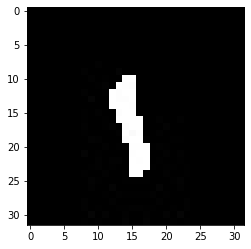

In [12]:
img = cv2.imread('dataset/alif/57.jpg')
plt.imshow(img)

## Build CNN Model

In [13]:
from keras.models import Sequential, Model
from tensorflow_keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

def model(num_classes, input_shape):
    model = Sequential()
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))
    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [39]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os
# Define constants
DATASET_PATH = './dataset/'
MODEL_PATH = '.'
BATCH_SIZE = 128
EPOCHS = 100
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
TARGET_DEPTH = 3

In [40]:
# Set up the data generator to flow data from disk
print("[INFO] Setting up Data Generator...")
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = data_gen.flow_from_directory(
    DATASET_PATH, 
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)
val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

[INFO] Setting up Data Generator...
Found 1720 images belonging to 37 classes.
Found 407 images belonging to 37 classes.


In [41]:
# Build model
print("[INFO] Compiling model...")
alexnet = model(train_generator.num_classes, (TARGET_WIDTH, TARGET_HEIGHT, TARGET_DEPTH))
# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] Compiling model...


In [42]:
# Set the learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [43]:
# Train the network
print("[INFO] Training network ...")
H = alexnet.fit_generator(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps = val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])
# save the model to disk
print("[INFO] Serializing network...")
alexnet.save(MODEL_PATH + os.path.sep + "trained_model")
print("[INFO] Done!")

[INFO] Training network ...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


13/13 [==============================] - 2s 120ms/step - loss: 3.6976 - accuracy: 0.0239 - val_loss: 3.6112 - val_accuracy: 0.0312 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 1s 99ms/step - loss: 3.6113 - accuracy: 0.0192 - val_loss: 3.6102 - val_accuracy: 0.0260 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 1s 95ms/step - loss: 3.6108 - accuracy: 0.0239 - val_loss: 3.6091 - val_accuracy: 0.0234 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 1s 97ms/step - loss: 3.6095 - accuracy: 0.0226 - val_loss: 3.6068 - val_accuracy: 0.0286 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 1s 96ms/step - loss: 3.6088 - accuracy: 0.0333 - val_loss: 3.6021 - val_accuracy: 0.0365 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 1s 100ms/step - loss: 3.5731 - accuracy: 0.0276 - val_loss: 3.4676 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 1s 103ms/step - loss: 3.495

[INFO] Done!


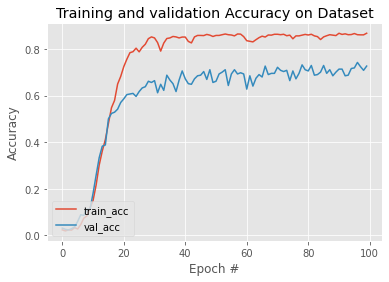

In [44]:
import matplotlib.pyplot as plt
# plot the training accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(MODEL_PATH + os.path.sep + "plot_acc.png")

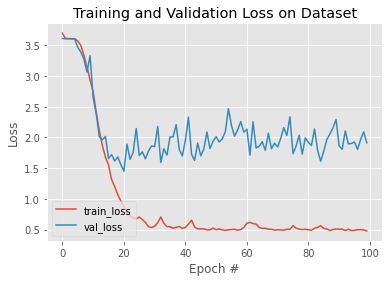

In [45]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(MODEL_PATH + os.path.sep + "plot_loss.png")

In [48]:
# save the model
# model.save('pashto_model.h5')

In [ ]:
# labels = [
#     '0','1','2','3','4','5','6','7','8','9','0',
#     'alif','be','chay','daal','fay','gaaf','ghain','hay','haye','jim','kaaf','khay','khin','laam','mim','num',
#     'nunr','pe','qaaf','raay','ray','se','shin','sin','swaad','te','Tey','tsay','tway','tzay','wao','yay','yay1','yay2','yay3',
#     'yay4','zaal','zay','zhay','zhayghay','zwad','zway'
#     ]